# 01. Ridership Trend Analysis

In [4]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_csv('transit-ridership.csv') #First read all the data from the csv file
df= df.rename(columns={'Unnamed: 0': 'Year'}) #Rename the unnamed column title to 'Year'
for i in df.columns: #for each column
    df[i] = df[i].replace(",", "", regex=True) #remove all the commas in between each values
df = df._convert(numeric=True) #convert the elements to numeric values
df.describe()

,July,October,December,February,Total
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.500000e+01
mean,353758.269231,1.200681e+06,7.662968e+05,1.181454e+06,1.018373e+07
std,80252.448764,2.425953e+05,1.791262e+05,2.563263e+05,2.005362e+06
min,226004.000000,3.437650e+05,2.141830e+05,3.180710e+05,3.480360e+06
25%,289194.000000,1.130592e+06,6.893980e+05,1.122582e+06,9.365436e+06
50%,339788.500000,1.209716e+06,7.923785e+05,1.171838e+06,1.010266e+07
75%,412077.750000,1.337396e+06,8.695310e+05,1.325072e+06,1.152838e+07
max,524178.000000,1.606340e+06,1.068610e+06,1.582330e+06,1.355178e+07


In [6]:
#Eliminating null values 
#To do so, if we find a null, we are going to replace them with the mean of the column
count = 1997
total = len(df[i])
for i in df.columns:
    if i == 'Year':
        df[i] = np.array([x for x in range(count,count+total)])

df = df.dropna(axis=0) #we are going to drop NaN values for conveinience
df #JUST FOR CHECKING

,Year,July,October,December,February,Total
0,1997,287136,1052714,807508,1157678,9501302.0
1,1998,289269,1142300,753231,982453,8670906.0
2,1999,281914,1055683,673696,1006772,8628101.0
3,2000,297848,1060153,650067,1091131,8800655.0
4,2001,270213,1085119,825356,1159928,10102665.0
5,2002,286552,1227976,524747,1118989,9084277.0
6,2003,311041,1169216,787201,1133363,9369218.0
7,2004,338494,1305943,813161,1154057,10435923.0
8,2005,341083,1217625,739941,1200637,10136585.0
9,2006,289169,1135129,736504,1167974,9958497.0


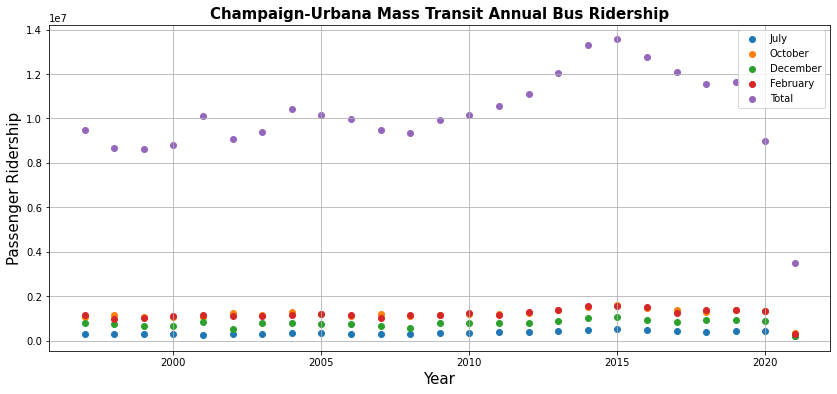

In [7]:
#### Now we are going to plot the graph using matplotlib to visualize our data input
x = df['Year'] #x-axis is going to be our year
figure = plt.figure(figsize=(14,6)) #adjust the figure size
plt.title('Champaign-Urbana Mass Transit Annual Bus Ridership',fontweight='bold',fontsize=15) #add the title
plt.grid() #add the grid
plt.xlabel('Year',fontsize=15) #add the x-axis label
plt.ylabel('Passenger Ridership',fontsize=15) #add the y-axis label
temp = df.drop('Year',axis=1) #Just drop the year column because we are not going to use that for our data analytics
for i in temp.columns: #Now for each column in our python dataframe column
    plt.scatter(x,temp[i]) #I want to keep plotting
    
plt.legend(temp) #Don't forget to add the legend

Text(0.5, 1.0, 'Passenger Ridership vs Months')

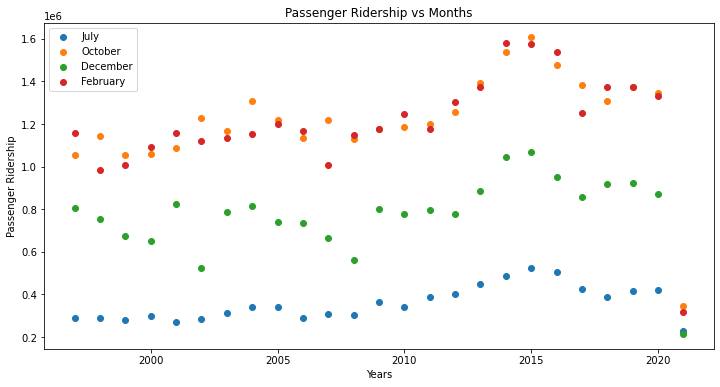

In [8]:
months1 = df.drop('Year',axis=1)
months = months1.drop('Total',axis=1)
plt.figure(figsize=(12,6))
for i in months.columns:
    plt.scatter(x,months[i])
plt.legend(months)
plt.xlabel('Years')
plt.ylabel('Passenger Ridership')
plt.title('Passenger Ridership vs Months')

# 02. Machine Learning and Dataset Training

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

### Decision Tree 

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [11]:
y_feat = df.Total #The total is going to be the y-axis
featured_axis = ['Year','July','October','December','February'] #The featured axis are the months
x_feat = df[featured_axis] #The featured axis will be stored into the x featured

##############Dataset Training############
pass_decision_model = DecisionTreeRegressor() #DecisionTreeRegressor is called
pass_decision_model.fit(x_feat, y_feat) #Model is fitted accordingly
predicted_decision_pass = pass_decision_model.predict(x_feat) #Prediction is made
mean_absolute_error(y_feat, predicted_decision_pass) #MAE value of 0 means perfect model

0.0

In [12]:
train_x, val_x, train_y, val_y = train_test_split(x_feat, y_feat, random_state = 0)
# Define the model using DecisionTreeRegressor
pass_decision_model2 = DecisionTreeRegressor()
# Fit the model with trained x dataset and y dataset
pass_decision_model2.fit(train_x, train_y)

# Approximate predicted passenger ridership on validation data
val_predict = pass_decision_model2.predict(val_x)
print(mean_absolute_error(val_y, val_predict)) #maybe not the best model

407370.5714285714


### Random Forest 

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

pass_forest_model = RandomForestRegressor(random_state=1)
pass_forest_model.fit(train_x, train_y)
pass_forest_preds = pass_forest_model.predict(val_x)
print(mean_absolute_error(val_y, pass_forest_preds))

350535.9885714283


# 04. Time Series Forecasting 

In [14]:
plt.rc("figure", autolayout=True, figsize=(12, 6))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize = 17,
    titlepad = 10,
    grid = True
)

plot_params = dict(
    color = 'r',
    style = '.',
    markeredgecolor = '0.5',
    markerfacecolor = '0.5',
    legend = True
)


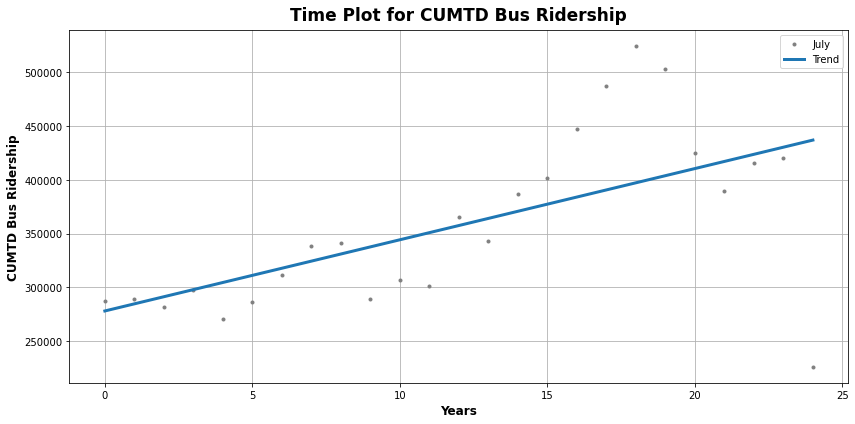

In [15]:
from sklearn.linear_model import LinearRegression

xt = df.loc[:,['Year']] #first get the years
yt = df.loc[:,'July'] #then get the feature (July)

lin_model = LinearRegression()
lin_model.fit(xt,yt)
yt_pred = pd.Series(lin_model.predict(xt), index=xt.index)

ax = yt.plot(**plot_params)
ax = yt_pred.plot(linewidth=3,label='Trend')
ax.set_title('Time Plot for CUMTD Bus Ridership')
ax.set_xlabel('Years')
ax.set_ylabel('CUMTD Bus Ridership')
ax.legend()